## MCX simulation based on package

In [1]:
! pip install pmcx
! pip install numpy pmcx jdata bjdata matplotlib
#! git clone --recursive https://github.com/fangq/mcx.git

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
import os
import pmcx

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
folder_path = '/content/drive/MyDrive/MCX_data'
if folder_path not in sys.path:
    sys.path.append(folder_path)
from FD_msNIRS import mcx_simulation as ms

In [4]:
pmcx.gpuinfo()

[{'name': 'NVIDIA A100-SXM4-40GB',
  'id': 1,
  'devcount': 1,
  'major': 8,
  'minor': 0,
  'globalmem': 42474471424,
  'constmem': 65536,
  'sharedmem': 49152,
  'regcount': 65536,
  'clock': 1410000,
  'sm': 108,
  'core': 6912,
  'autoblock': 64,
  'autothread': 442368,
  'maxgate': 0}]

### MCX Simulation using packgae

In [5]:
import pmcx
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle

In [6]:
n = 1.370
c = 2.998e+10
c = (c / n) # cm/s
ua = 0.01 # mm-1
us = 15 # mm-1
ua_cm = ua*10
us_cm = us*10

In [7]:
data, time_unit = ms(ua, us, g=0.85, n=1.370, distance = 15, tend =1e-08, devf = 1000, nphoton = 1e8)

nphoton: 1e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1


In [8]:
area = np.trapz(data, dx=time_unit)
print(area)

0.9990000031031059


<ipython-input-8-95db06dd7514>:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(data, dx=time_unit)


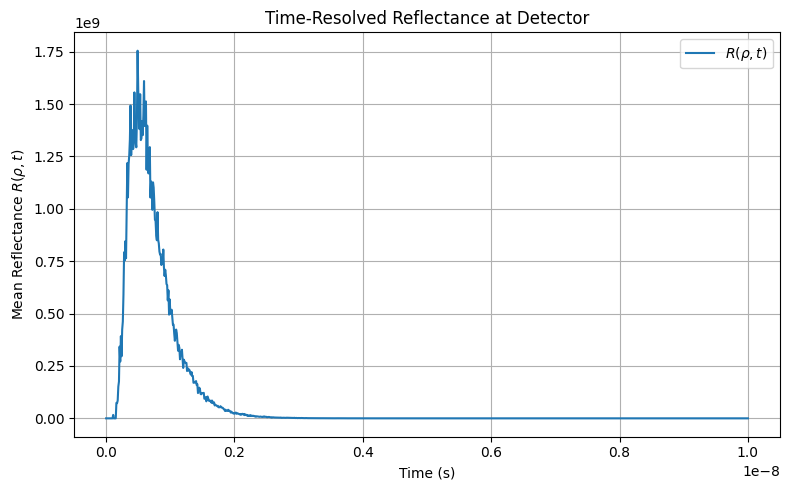

In [9]:
# Plot
times = np.linspace(0, len(data)*time_unit, len(data))
plt.figure(figsize=(8, 5))
plt.plot(times, data, label=r"$R(\rho, t)$")
plt.xlabel("Time (s)")
plt.ylabel("Mean Reflectance $R(\\rho, t)$")
plt.title("Time-Resolved Reflectance at Detector")
plt.grid(True)
#plt.xlim(0, 0.1e-8)
plt.legend()
plt.tight_layout()
plt.show()

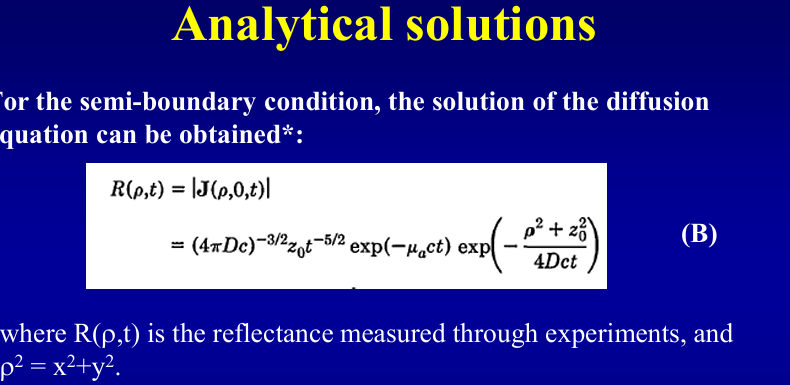

In [10]:
mean_dref_per_time_ln = [np.log(x) for x in data]
print(len(mean_dref_per_time_ln))

1000


<ipython-input-10-340a4d239aa6>:1: RuntimeWarning: divide by zero encountered in log
  mean_dref_per_time_ln = [np.log(x) for x in data]


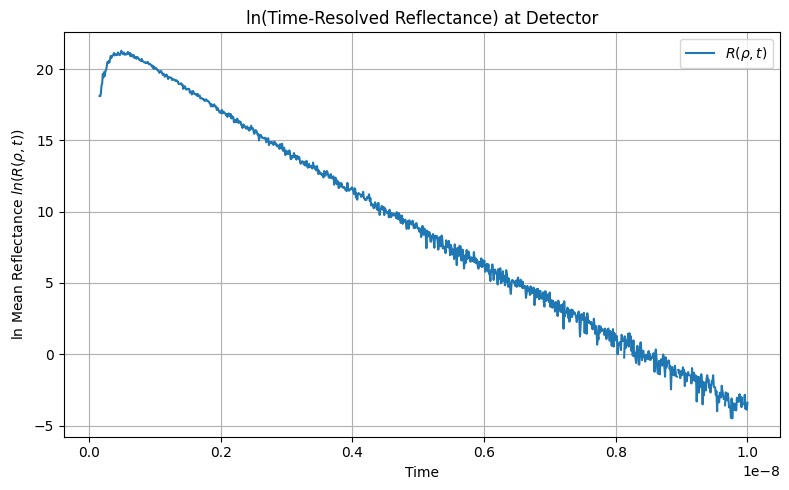

In [11]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(times, mean_dref_per_time_ln, label=r"$R(\rho, t)$")
plt.xlabel("Time")
plt.ylabel("ln Mean Reflectance $ln(R(\\rho, t))$")
plt.title("ln(Time-Resolved Reflectance) at Detector")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
def compute_slope(x1, y1, x2, y2):
  if x2 != x1:
      return (y2 - y1) / (x2 - x1)
  else:
      return None

In [13]:
ua = -(compute_slope(time_unit* 100, mean_dref_per_time_ln[100], time_unit*350, mean_dref_per_time_ln[350]))/c
print('ua=', ua,'/mm-1')
print('ua=',ua*10,'/cm-1')

ua= 0.13298639804337392 /mm-1
ua= 1.329863980433739 /cm-1


### Package testing

In [14]:
from FD_msNIRS import mcx_fft as mf
from FD_msNIRS import extract_freq as ef
import numpy as np
import matplotlib.pyplot as plt

In [15]:
ua = 0.01 # mm-1
us = 15 # mm-1
ua_cm = ua*10
us_cm = us*10
tstep = 1e-08/1000
nphoton = 1e8

In [16]:
#data, time_unit = ms(ua, us, g=0.85, n=1.370, distance = 15, tend =1e-08, devf = 1000, nphoton = 1e8)

In [17]:
uac, udc, phase, x =  ef(target_freq = 500e6, TPSF = data, tend=1e-08, devf=1000)

0.25977924652825624


In [18]:
print(uac, udc, phase)

0.6204732842436388 1.0000000031062122 -1.9920326434309


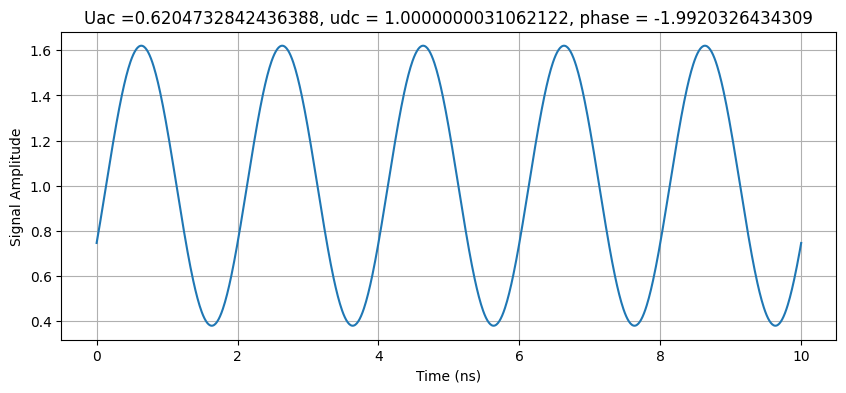

In [19]:
# Time vector for 5 cycles
T = 1 / 500e6
t = np.linspace(0, 5 * T, 1000)
signal = udc + uac * np.cos(2 * np.pi * 500e6 * t + phase)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t * 1e9, signal)  # time in ns
plt.title(f"Uac ={uac}, udc = {udc}, phase = {phase}")
plt.xlabel("Time (ns)")
plt.ylabel("Signal Amplitude")
plt.grid(True)
plt.show()

### Amp vs Freq

In [20]:
frequencies = np.linspace(0, 2000e6, 100)
amplitude = np.zeros_like(frequencies) # empty array
phase1 = np.zeros_like(frequencies) # empty array
phase2 = np.zeros_like(frequencies) # empty array
udcs = np.zeros_like(frequencies) # empty array

for k, f in enumerate(frequencies):
  amplitude[k], udcs[k], phase1[k] , phase2[k]= ef(f, data, tend=1e-08, devf=1000)

0.0
2.7672936960543293e-05
0.0002205882329441855
0.0007400714665359853
0.0017398839316916104
0.003363077216195387
0.00573951779929649
0.008984169878731185
0.013196144980166968
0.018458459671319094
0.024838395247978373
0.03238832750717935
0.041146888379040014
0.05114032963264492
0.062383976886110304
0.074883685042616
0.08863723035559268
0.103635596966686
0.11986413523126371
0.13730358444376378
0.15593096332085454
0.1757203380248531
0.1966434804106436
0.21867042972316098
0.24176997032813974
0.26591003702059
0.291058058286473
0.3171812464858621
0.34424684215237766
0.37222231760329194
0.40107554328745465
0.43077491937584256
0.4612894755281576
0.49258894372392037
0.5246438122355253
0.5574253724599281
0.5909057732658609
0.6250580985188883
0.6598564815466621
0.6952762650854032
0.7312942069865409
0.7678887216542534
0.8050401364948505
0.8427309337939746
0.8809459438118408
0.9196724564971834
0.9589002278496852
0.998621371548206
1.0388301440289718
1.0795226475116713
1.1206964863166249
1.162350414

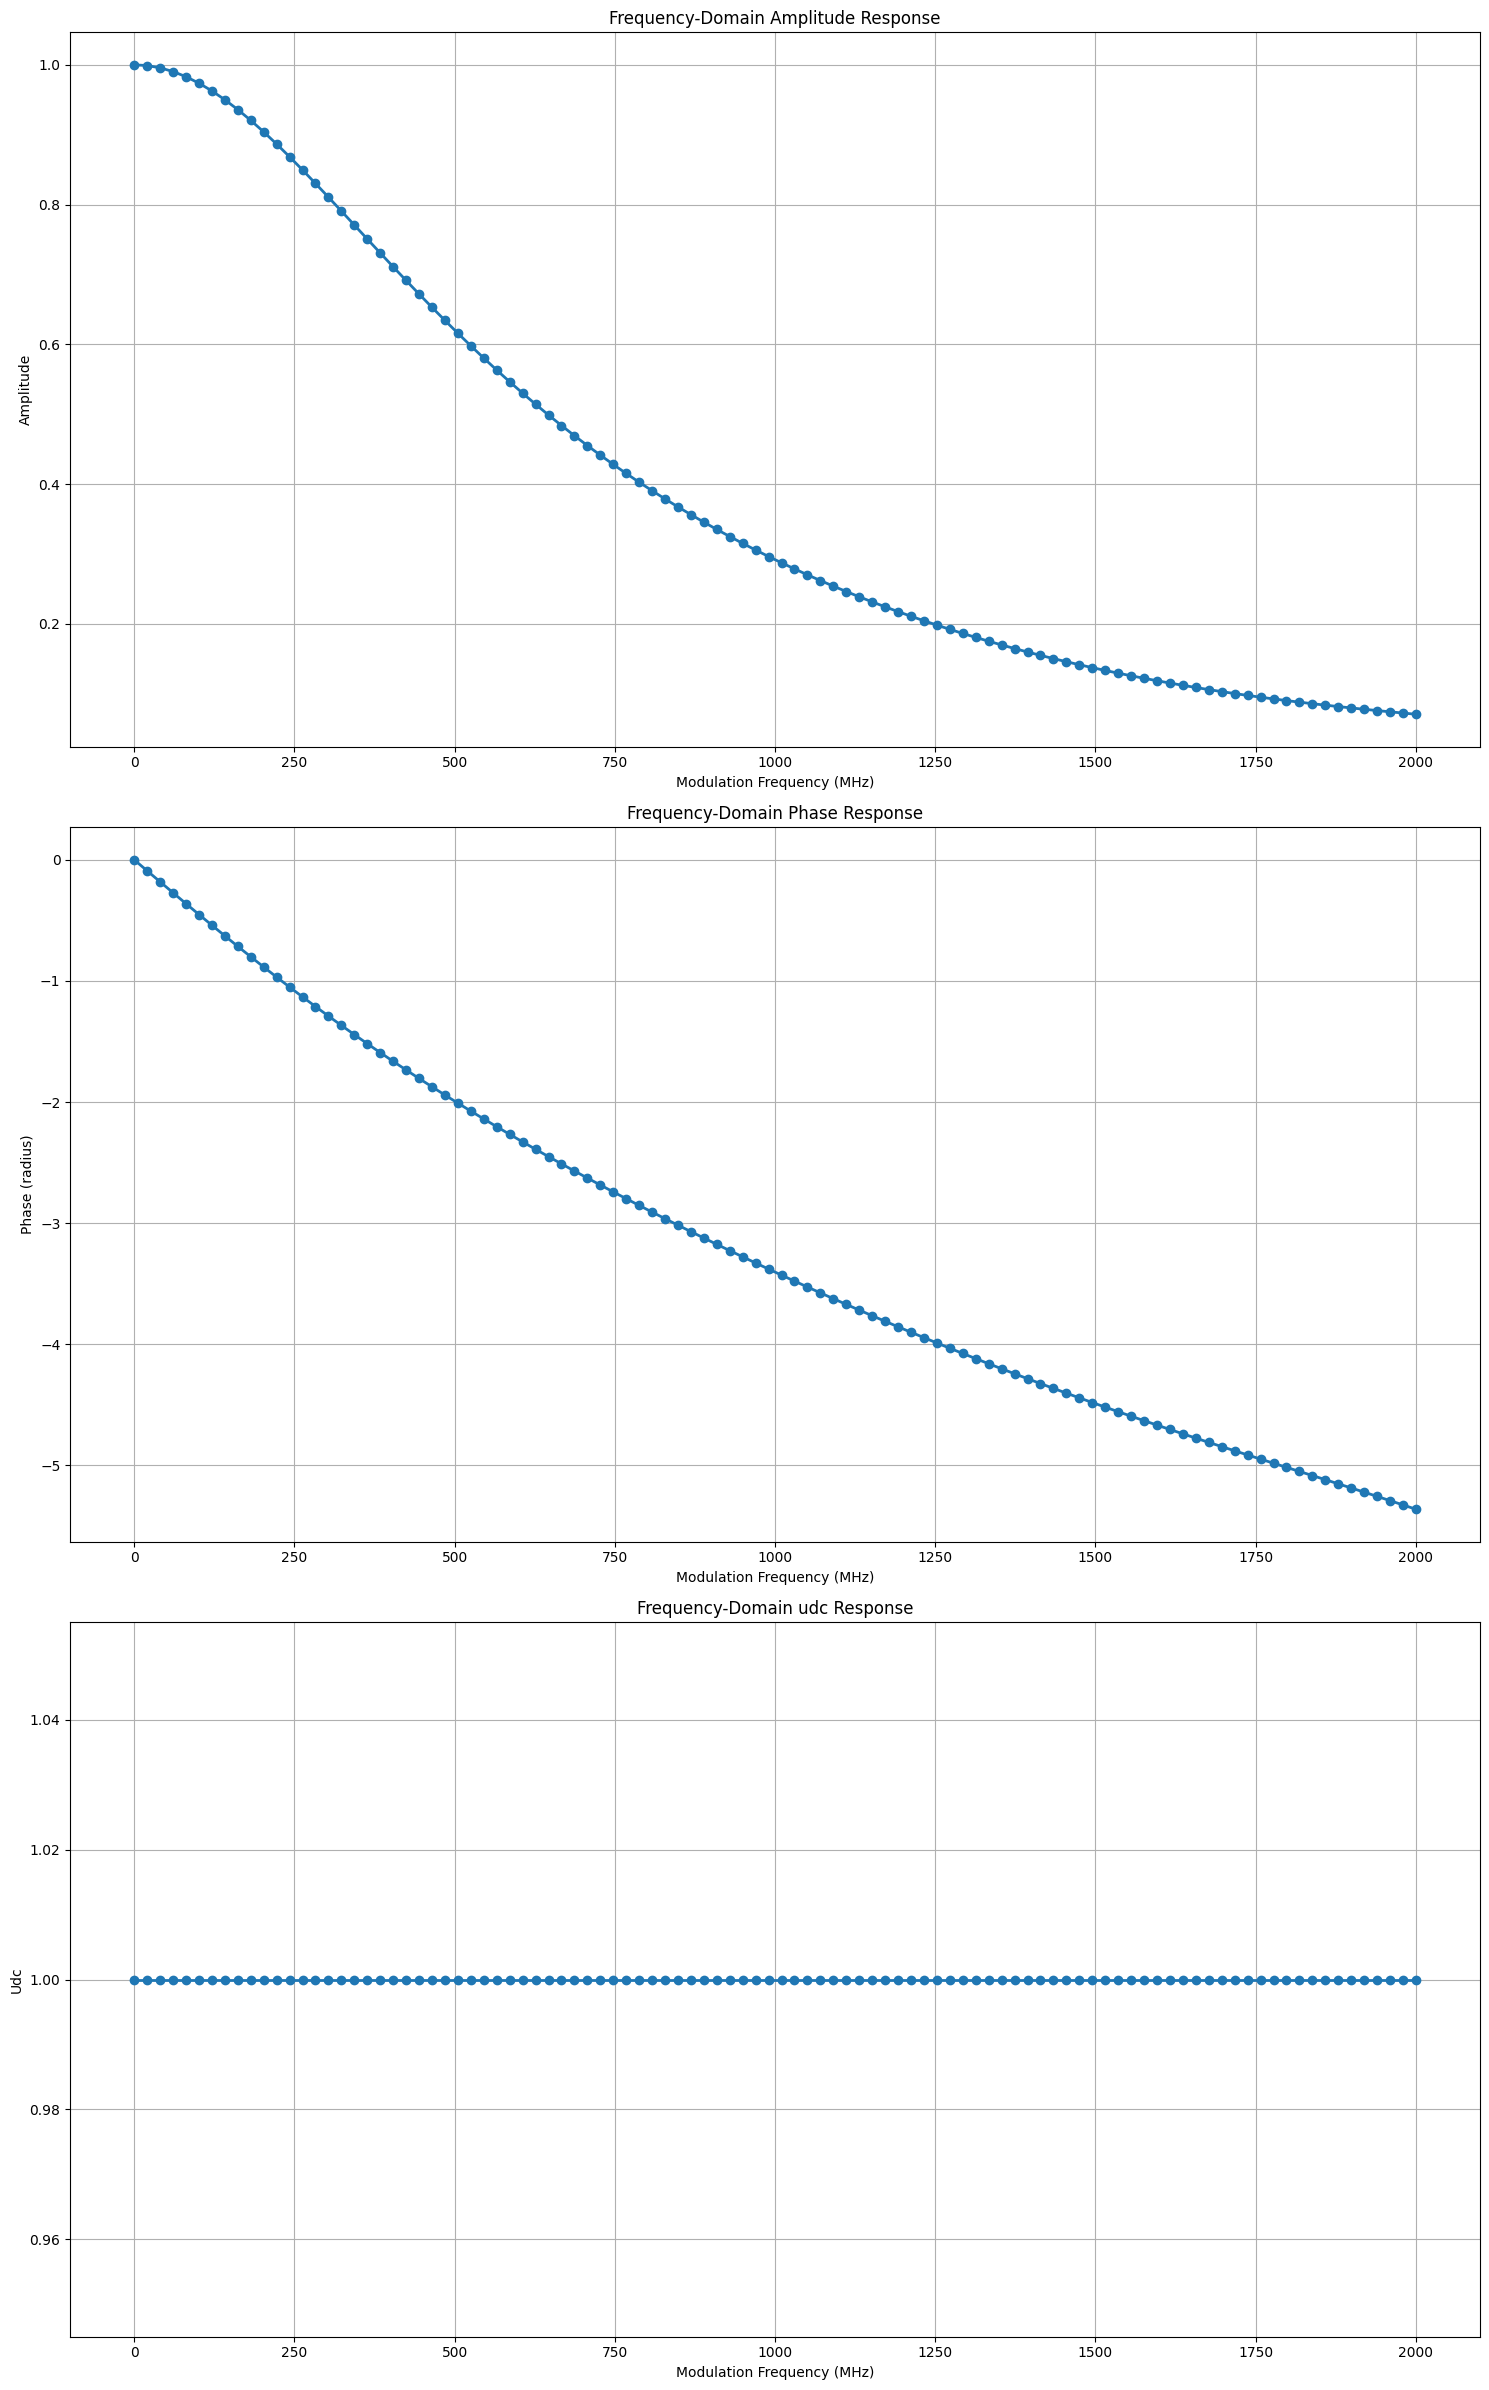

In [22]:
# Plot Amplitude and Phase
plt.figure(figsize=(15, 24))

plt.subplot(3, 1, 1)
plt.plot(frequencies * 1e-6, amplitude, 'o-', linewidth=2)
plt.xlabel('Modulation Frequency (MHz)')
plt.ylabel('Amplitude')
plt.title('Frequency-Domain Amplitude Response')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(frequencies * 1e-6, phase1, 'o-', linewidth=2)
plt.xlabel('Modulation Frequency (MHz)')
plt.ylabel('Phase (radius)')
plt.title('Frequency-Domain Phase Response')
plt.grid(True)


#plt.subplot(4, 1, 3)
#plt.plot(frequencies * 1e-6, phase2, 'o-', linewidth=2)
#plt.xlabel('Modulation Frequency (MHz)')
#plt.ylabel('Phase (radius)')
#plt.title('Frequency-Domain Phase Response')
#plt.grid(True)


plt.subplot(3, 1, 3)
plt.plot(frequencies * 1e-6, udcs, 'o-', linewidth=2)
plt.xlabel('Modulation Frequency (MHz)')
plt.ylabel('Udc')
plt.title('Frequency-Domain udc Response')
plt.grid(True)

plt.tight_layout()
plt.show()